# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_data = btc_data.json()
btc_data

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_data = eth_data.json()


In [6]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = round(my_btc * btc_price, 2)
my_eth_value = round(my_eth * eth_price, 2)


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $35272.80
The current value of your 5.3 ETH is $9893.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-07-25", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio
# Reorganize the DataFrame
# Separate ticker data
df_portfolio = df_portfolio.set_index('symbol')
df_portfolio = df_portfolio.drop(columns=['open','high','low','volume','trade_count','vwap'])
print(df_portfolio)
# Concatenate the ticker DataFrames
"""
Didnt need to as i pulled data as a single dataframe at the start.
"""

         close
symbol        
AGG      97.70
SPY     455.44


'\nDidnt need to as i pulled data as a single dataframe at the start.\n'

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.iloc[0,0]
spy_close_price = df_portfolio.iloc[1,0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.7
Current SPY closing price: $455.44


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22772.00
The current value of your 200 AGG shares is $19540.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = {'' :['Shares','Crypto'],
        'Amount': [my_spy_value, my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data)
df_savings = df_savings.set_index('')

# Display savings DataFrame
display(df_savings)

,Amount
,
Shares,22772.0
Crypto,19540.0


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

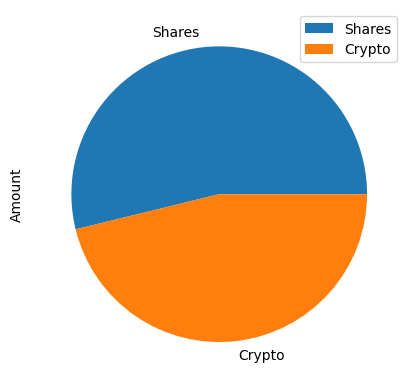

In [13]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = int(monthly_income) * 3


# Calculate total amount of savings
total_savings = int(df_savings.sum())


# Validate saving health
if emergency_fund < total_savings:
    print('Congratulations on exceeding your savings goal')
elif emergency_fund == total_savings:
    print('Congratulations on reaching your savings goal')
else:
    print(f'Your total savings are less than your emergency fund by {emergency_fund - total_savings}')


Congratulations on exceeding your savings goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-26', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG

df_5yr_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_5yr_portfolio


# Reorganize the DataFrame
# Separate ticker data
AGG = df_5yr_portfolio[df_5yr_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_5yr_portfolio[df_5yr_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-26 04:00:00+00:00  106.10  106.1500  105.950  106.00  2245020   
2018-07-27 04:00:00+00:00  106.13  106.1599  106.040  106.08  2637432   
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-07-26 04:00:00+00:00        9617  106.031610  283.20  284.11  283.0900   
2018-07-27 04:00:00+00:00       10297  106.083809  283.71  283.82  280.3800   
2018-07-30 04:00:00+00:00       16829  105.982889  281.51  281.69  279.3600   
2018-07-31 04:00:00+00:00       21794  106.093910  280.70  282.02  280.3800   
2018-08-01 04:00:00+00:00       18024  105.682721  281.56  282.13  280.1315   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-07-26 04:00:00+00:00  283.30  58005495      237666  283.483326  
2018-07-27 04:00:00+00:00  281.46  78312976      326991  281.784023  
2018-07-30 04:00:00+00:00  279.90  64319758      252060  280.290726  
2018-07-31 04:00:00+00:00  281.19  68584293      275208  281.218025  
2018-08-01 04:00:00+00:00  280.89  55015826      244835  281.076175

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-26 04:00:00+00:00  106.10  106.1500  105.950  106.00  2245020   
2018-07-27 04:00:00+00:00  106.13  106.1599  106.040  106.08  2637432   
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-26 04:00:00+00:00        9617  106.031610          NaN  283.20   
2018-07-27 04:00:00+00:00       10297  106.083809     0.000755  283.71   
2018-07-30 04:00:00+00:00       16829  105.982889    -0.001037  281.51   
2018-07-31 04:00:00+00:00       21794  106.093910     0.000849  280.70   
2018-08-01 04:00:00+00:00       18024  105.682721    -0.003394  281.56   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2018-07-26 04:00:00+00:00  284.11  283.0900  283.30  58005495      237666   
2018-07-27 04:00:00+00:00  283.82  280.3800  281.46  78312976      326991   
2018-07-30 04:00:00+00:00  281.69  279.3600  279.90  64319758      252060   
2018-07-31 04:00:00+00:00  282.02  280.3800  281.19  68584293      275208   
2018-08-01 04:00:00+00:00  282.13  280.1315  280.89  55015826      244835   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-26 04:00:00+00:00  283.483326          NaN  
2018-07-27 04:00:00+00:00  281.784023    -0.006495  
2018-07-30 04:00:00+00:00  280.290726    -0.005543  
2018-07-31 04:00:00+00:00  281.218025     0.004609  
2018-08-01 04:00:00+00:00  281.076175    -0.001067

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\duke_\OneDrive\FINTECH\Gitlab\MONU-VIRT-FIN-PT-06-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000686,0.996562,1.015334,0.992864,0.987622,1.001607,0.988357,0.995465,0.996973,1.007597,...,1.001678,1.003773,0.997069,1.002901,0.999145,1.002903,1.005058,1.003760,0.999894,0.993552
2,0.995163,1.008777,1.014159,0.983474,0.982067,1.007905,0.972087,0.981586,1.004910,1.007101,...,1.012230,1.011873,0.999625,1.007314,1.002295,0.997596,1.002207,0.995748,0.995474,0.998310
3,0.988957,1.026162,1.009084,0.987530,0.987732,1.010919,0.981092,0.975481,1.002758,1.016243,...,1.025894,1.003341,1.015549,1.008970,1.002757,0.985789,1.004283,0.986383,1.010071,1.004639
4,0.992295,1.026237,0.995768,0.993460,0.984366,0.996728,0.974928,0.963726,1.000186,1.021454,...,1.033635,0.995172,1.008247,1.012750,1.013533,0.987388,1.000013,0.985120,0.998891,1.012833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.333195,8.419013,7.771134,3.422874,16.032300,16.840561,7.057861,8.260144,2.930264,4.219120,...,2.286429,1.138764,11.543904,14.199983,3.840511,11.329666,2.135614,7.051057,4.958053,7.426828
7557,11.283784,8.453871,7.704886,3.400806,16.082303,16.827022,7.072732,8.283825,2.940122,4.287425,...,2.298653,1.141705,11.469609,14.479265,3.889563,11.347708,2.125888,7.059296,4.918769,7.409225
7558,11.333445,8.518530,7.694883,3.400867,16.052044,16.895133,7.048772,8.312400,2.943027,4.277728,...,2.291122,1.150830,11.451658,14.686132,3.923511,11.438741,2.124686,7.091226,4.926736,7.429107
7559,11.228803,8.484982,7.737249,3.427781,16.290466,16.918996,7.033186,8.312741,2.924244,4.311102,...,2.279851,1.154136,11.686805,14.481130,3.928529,11.523297,2.111366,7.055528,4.979539,7.387160


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

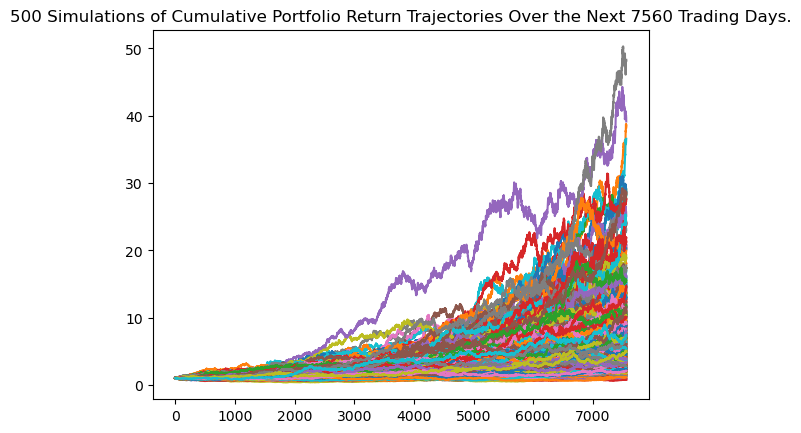

In [20]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

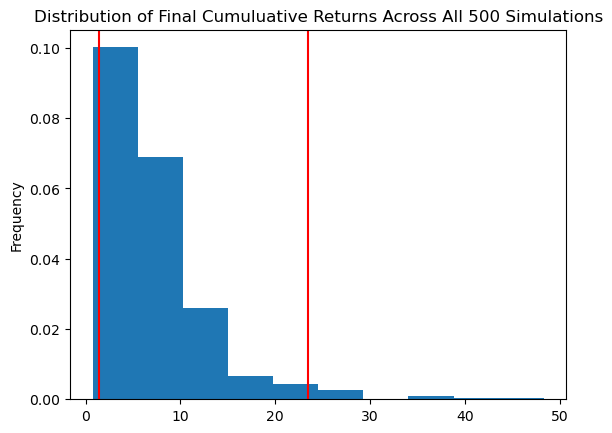

In [21]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_year_stats = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(thirty_year_stats)

count           500.000000
mean              7.214753
std               5.731186
min               0.770610
25%               3.617887
50%               5.875549
75%               8.639506
max              48.309843
95% CI Lower      1.460508
95% CI Upper     23.423485
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_year_stats[8]*initial_investment,2)
ci_upper = round(thirty_year_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $29210.16 and $468469.7


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.thirty_year_stats

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_year_stats[8]*initial_investment,2)
ci_upper = round(thirty_year_stats[9]*initial_investment,2)
ci_mean = round(thirty_year_stats[1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, mean of ${ci_mean}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $43815.25 and $702704.55, mean of $216442.59


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\duke_\OneDrive\FINTECH\Gitlab\MONU-VIRT-FIN-PT-06-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012107,1.004006,1.013323,0.988808,1.015609,1.023382,0.994224,0.990176,1.002881,1.007686,...,0.982279,0.980554,1.001570,0.988470,1.027277,1.016573,1.006726,0.999695,0.993246,1.002839
2,1.024669,0.994642,1.022812,0.992657,1.026242,1.027800,0.987044,0.991282,0.989121,1.005699,...,0.979267,0.985892,1.003659,0.979634,1.019542,1.004837,1.005488,1.010062,0.997032,0.999617
3,1.014003,0.985279,1.022862,0.991439,1.022758,1.067691,0.977867,0.996614,0.990297,0.997622,...,0.991656,0.977315,0.992637,0.989353,1.014297,0.994853,1.021102,1.017060,0.975301,1.006153
4,1.004859,0.974596,1.031776,1.008934,1.025365,1.060945,0.976784,0.998202,0.979291,1.019229,...,1.008152,0.976557,0.981548,0.996606,1.012146,1.009244,1.033432,0.991284,0.952900,1.004965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.853247,2.545308,1.052383,1.056256,1.577553,1.570276,5.033926,1.175572,1.572015,1.041606,...,1.354272,1.324138,2.631408,1.537472,0.603006,1.176291,3.838678,1.920108,2.005269,1.429958
1257,0.849001,2.528608,1.052044,1.040488,1.567662,1.572109,5.068399,1.170405,1.554768,1.016360,...,1.364190,1.356262,2.588936,1.538286,0.594783,1.151000,3.813572,1.976375,1.956869,1.412971
1258,0.849350,2.520207,1.045986,1.061219,1.552121,1.567152,5.109284,1.156819,1.558957,1.024050,...,1.391712,1.338037,2.579532,1.547224,0.604498,1.169871,3.820846,1.960216,1.962887,1.434506
1259,0.849304,2.534039,1.049667,1.048694,1.547894,1.576009,5.066922,1.164534,1.554085,1.021003,...,1.375677,1.354968,2.584084,1.534581,0.615215,1.161058,3.771856,1.939063,1.991380,1.464776


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

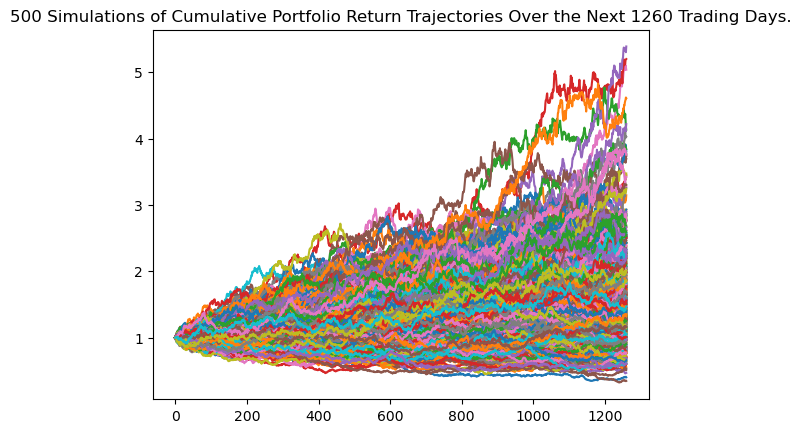

In [27]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

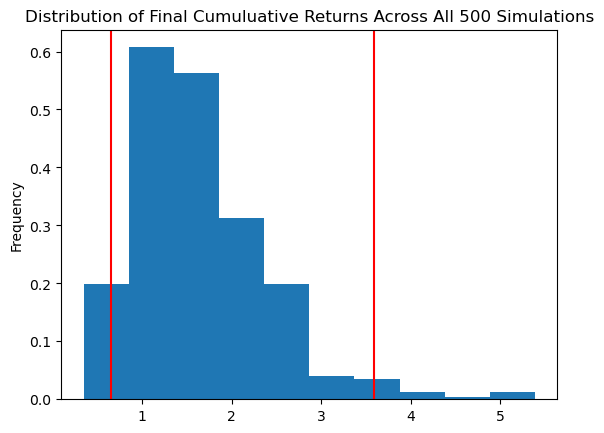

In [28]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_stats = MC_five_year.summarize_cumulative_return()

# Print summary statistics
five_year_stats

count           500.000000
mean              1.657380
std               0.744440
min               0.347842
25%               1.137117
50%               1.527769
75%               2.015696
max               5.386432
95% CI Lower      0.650119
95% CI Upper      3.588190
Name: 1260, dtype: float64

In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(five_year_stats[8]*initial_investment,2)
ci_upper = round(five_year_stats[9]*initial_investment,2)
ci_mean = round(five_year_stats[1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, mean of ${ci_mean}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $39007.17 and $215291.38, mean of $99442.79


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.1,.9],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\duke_\OneDrive\FINTECH\Gitlab\MONU-VIRT-FIN-PT-06-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018442,0.994897,1.014277,1.014297,1.014191,0.998313,1.000013,0.980354,0.996885,0.988342,...,0.999698,0.999887,1.012304,1.020386,1.010772,1.022114,0.988369,1.008347,0.975555,0.987907
2,0.999742,1.006044,1.019849,1.035579,1.026655,0.997505,1.002688,0.979297,0.986160,0.991277,...,0.977962,0.998219,1.032408,1.035873,1.034504,1.024023,0.993552,1.037012,1.007227,0.982705
3,1.024883,1.003150,1.018023,1.058053,1.028523,0.976239,1.006408,0.988420,0.988558,0.985754,...,0.996801,0.989877,1.040922,1.039056,1.035886,1.013589,0.977407,1.029990,0.993325,0.973952
4,1.030680,0.992784,1.013321,1.066976,1.007784,0.973283,0.989931,0.980175,0.992749,0.978872,...,0.976909,1.002080,1.051651,1.041966,1.031907,1.022084,0.988832,1.041131,1.005711,0.974077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.126164,1.603838,1.425744,2.956223,4.629060,2.864692,2.857956,2.389115,3.312402,3.261974,...,1.966547,10.604053,0.952037,3.809772,4.109817,2.844003,3.144274,3.737202,1.198896,3.982549
2517,3.193504,1.588802,1.427542,2.912813,4.698028,2.863100,2.897695,2.387464,3.322225,3.286443,...,2.002966,10.513957,0.977101,3.749082,4.149851,2.771258,3.198204,3.791347,1.192228,3.941311
2518,3.194877,1.589222,1.391094,2.887374,4.697708,2.788349,2.878648,2.420362,3.343900,3.246978,...,2.024053,10.589602,0.989288,3.744823,4.189151,2.802164,3.194431,3.859890,1.203564,3.951179
2519,3.164289,1.584669,1.410672,2.906603,4.643602,2.823989,2.890132,2.429019,3.325935,3.230785,...,2.017331,10.505907,0.994537,3.692887,4.148704,2.819949,3.249464,3.850694,1.206284,3.953801


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

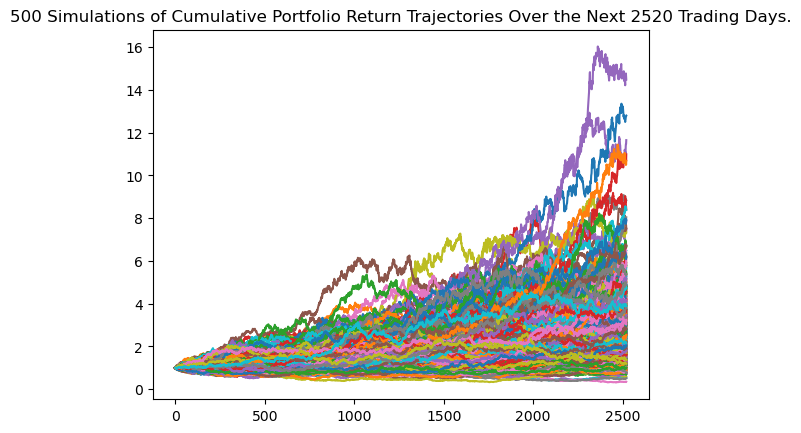

In [33]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

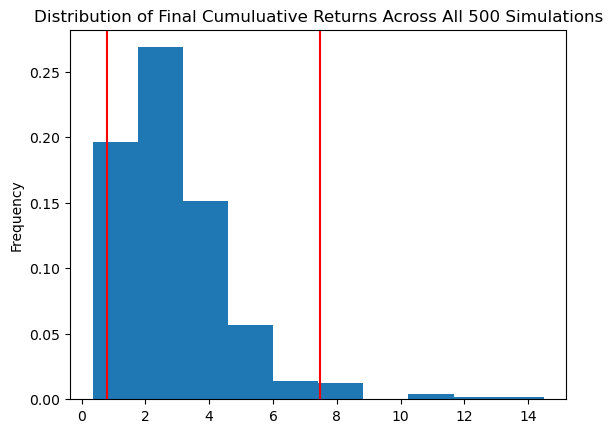

In [34]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_stats = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
ten_year_stats

count           500.000000
mean              2.893892
std               1.763057
min               0.349410
25%               1.689701
50%               2.526316
75%               3.626547
max              14.490421
95% CI Lower      0.788251
95% CI Upper      7.479883
Name: 2520, dtype: float64

In [36]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(ten_year_stats[8]*initial_investment,2)
ci_upper = round(ten_year_stats[9]*initial_investment,2)
ci_mean = round(ten_year_stats[1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, mean of ${ci_mean}")

# Set initial investment #2
initial_investment_2 = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(ten_year_stats[8]*initial_investment_2,2)
ci_upper = round(ten_year_stats[9]*initial_investment_2,2)
ci_mean_2 = round(ten_year_stats[1]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}, mean of ${ci_mean_2}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47295.03 and $448792.97, mean of $173633.54
There is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $55177.54 and $523591.8, mean of $202572.47


In [39]:
"""
30 year - Investment $30k, Weight 0.4 & 0.6, there is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40395.58 and $531600.58, and a mean of $193454.49
5 year - Investment $60k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $40824.3 and $206909.73, and a mean of $99500.28
10 year - Investment $60k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47295.0 and $448792.97, and a mean of $173633.54
10 year - Investment $90k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $55177.54 and $523591.8, and a mean of $202572.47

From the data above to be able to retire early it is not probable in 5yrs, even with shares heavily weighted at 0.9. Retiring early in 10yrs is possible with shares weighted to 90% and an inital investment of $70k
instead of $60k with a mean return of $202k. I dont think i could retire off that amount myself but that surpasses the 30yr mean which is the bench mark. 

"""

'\n30 year - Investment $30k, Weight 0.4 & 0.6, there is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40395.58 and $531600.58, and a mean of $193454.49\n5 year - Investment $60k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $40824.3 and $206909.73, and a mean of $99500.28\n10 year - Investment $60k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47295.0 and $448792.97, and a mean of $173633.54\n10 year - Investment $90k, Weight 0.1 & 0.9, there is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $55177.54 and $523591.8, and a mean of $202572.47\n\nFrom the data above to be able to retire early it is not probable in 5yrs, even with sh